In [1]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
import datetime as dt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

                   Flows
Time                    
2023-10-14  3.189036e+04
2023-10-15  4.155353e+05
2023-10-16  5.182629e+05
2023-10-17  4.795263e+05
2023-10-18  4.786310e+05
2023-10-19  4.661992e+05
2023-10-20  3.564186e+05
2023-10-21  3.498585e+05
2023-10-22  3.498400e+05
2023-10-23  3.498400e+05
2023-10-24  1.012717e+06
2023-10-25  4.845941e+05
2023-10-26  4.803123e+05
2023-10-27  4.742660e+05
2023-10-28  1.863127e+06
2023-10-29  1.955043e+06
2023-10-30  2.269965e+06
2023-10-31  2.264853e+06
2023-11-01  2.191215e+06
2023-11-02  3.284709e+06
2023-11-03  4.333227e+06
2023-11-04  3.852745e+06
2023-11-05  3.527186e+06
2023-11-06  4.547561e+06
2023-11-07  4.721632e+06
2023-11-08  5.363928e+06
2023-11-09  4.497556e+06
2023-11-10  2.877338e+06
2023-11-11  2.507219e+06
2023-11-12  2.262543e+06
2023-11-13  2.974536e+06
2023-11-14  5.251124e+06
2023-11-15  5.036166e+06
2023-11-16  3.835770e+06
2023-11-17  2.914427e+06
2023-11-18  2.161148e+06
2023-11-19  8.362790e+05
2023-11-20  2.489791e+04


<AxesSubplot:title={'center':'Flows'}, xlabel='Time'>

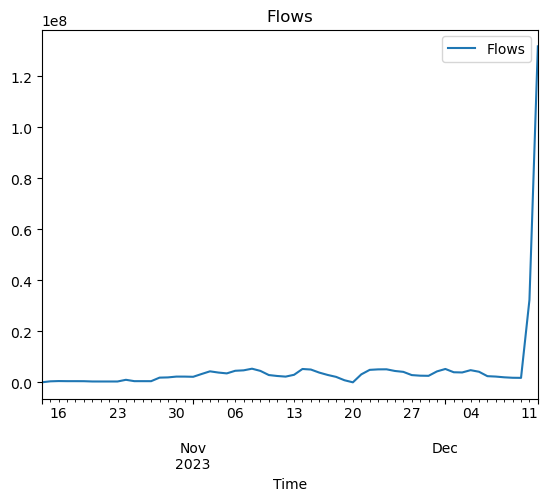

In [2]:
flowNum = pd.read_csv('C:/Users/rocco/OneDrive/Desktop/test/FlowsTest.csv',parse_dates=True)
flowNum['Time'] = pd.to_datetime(flowNum['Time'])
flow = flowNum.resample('D', on='Time').sum()
print(flow)
print(flow.shape)
flow.plot(title='Flows')

In [22]:
decompose_result = seasonal_decompose(flow['Flows'], model='multiplicative',period=1)

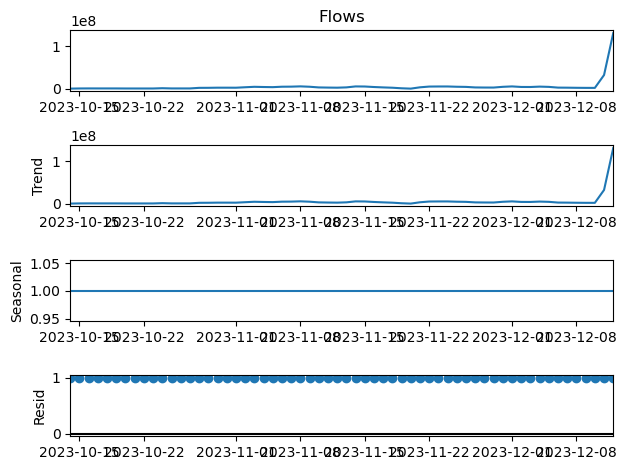

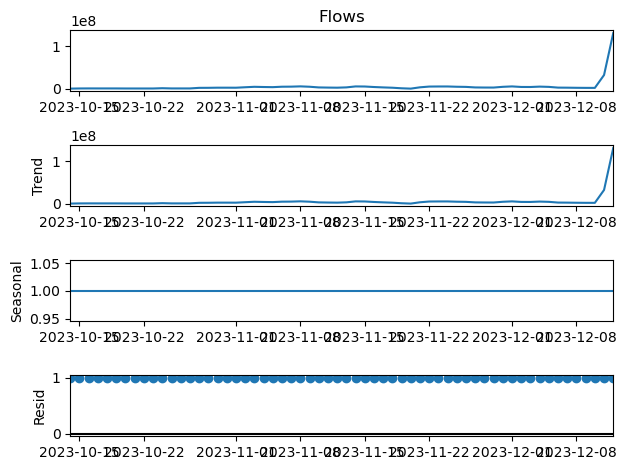

In [23]:
decompose_result.plot()

In [17]:
# Set the value of Alpha and define m (Time Period)
m = 1
alpha = 1/(2*m)

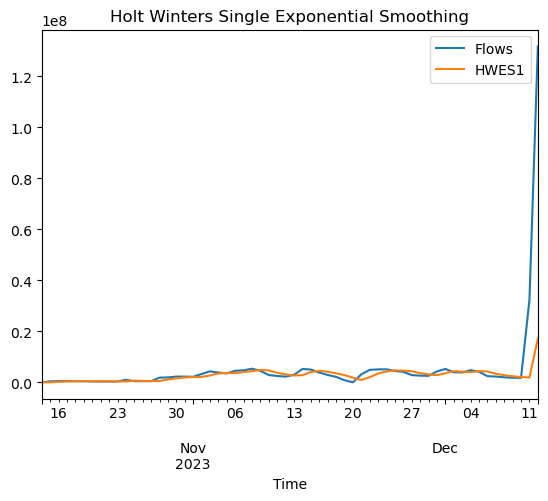

In [18]:
#Single exponential smoothing of the flows data set
flow['HWES1'] = SimpleExpSmoothing(flow['Flows']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
flow[['Flows','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

C:\Users\rocco\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\rocco\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


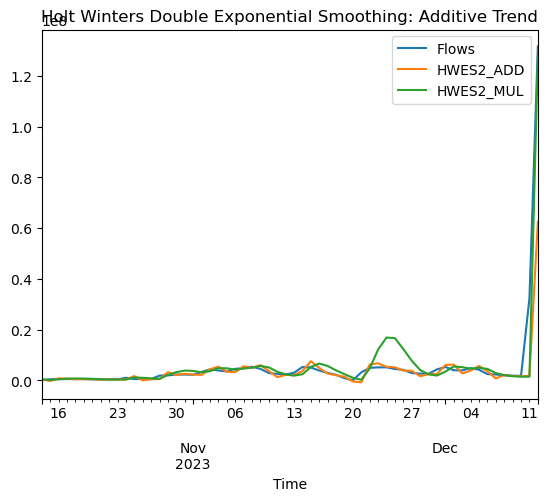

In [19]:
flow['HWES2_ADD'] = ExponentialSmoothing(flow['Flows'],trend='add').fit().fittedvalues
flow['HWES2_MUL'] = ExponentialSmoothing(flow['Flows'],trend='mul').fit().fittedvalues
flow[['Flows','HWES2_ADD', 'HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive Trend');

C:\Users\rocco\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\rocco\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


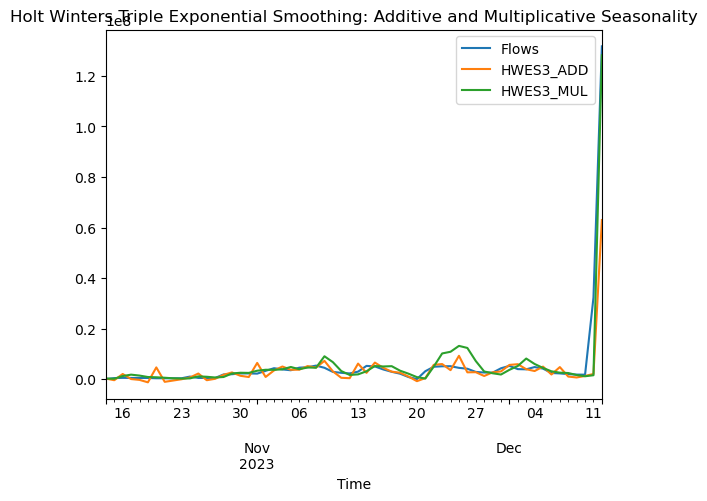

In [20]:
flow['HWES3_ADD'] = ExponentialSmoothing(flow['Flows'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
flow['HWES3_MUL'] = ExponentialSmoothing(flow['Flows'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
flow[['Flows','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

C:\Users\rocco\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

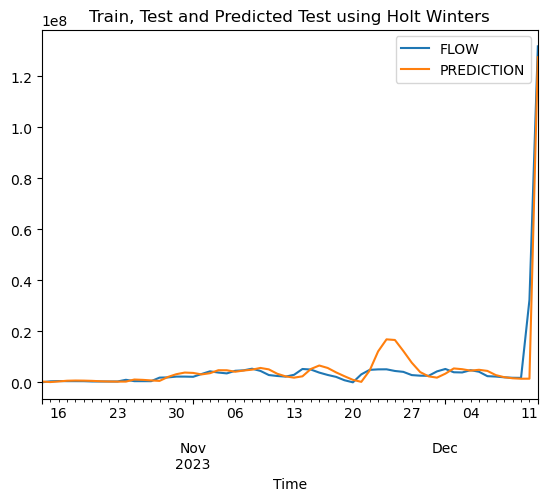

In [21]:
fitted_model = ExponentialSmoothing(flow['Flows'],trend='mul',seasonal_periods=1).fit()
test_predictions = fitted_model.predict(start=0, end=len(flow)-1)
flow['Flows'].plot(legend=True,label='FLOW')
#test_flows['Flows'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

<AxesSubplot:xlabel='Time'>

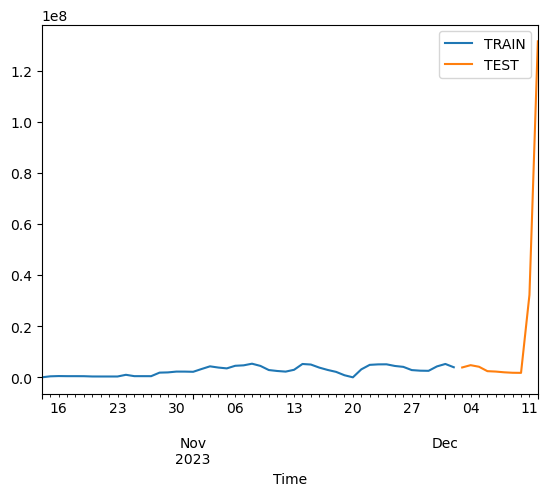

In [3]:
forecast_data = flowNum.resample('D', on='Time').sum()
train_flows = forecast_data[:50]
test_flows = forecast_data[50:]
train_flows['Flows'].plot(legend=True,label='TRAIN')
test_flows['Flows'].plot(legend=True,label='TEST')



C:\Users\rocco\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

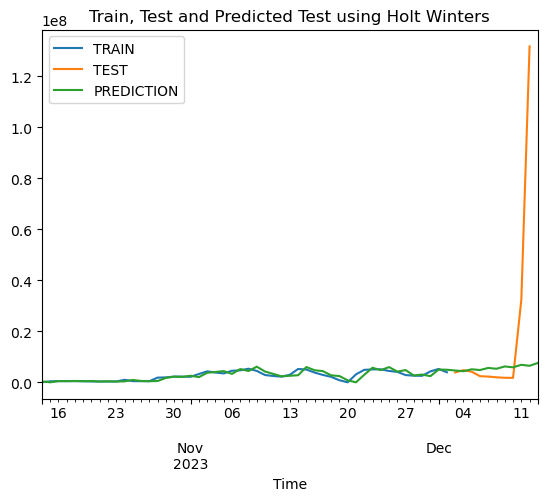

In [4]:
fitted_model = ExponentialSmoothing(train_flows['Flows'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.predict(start=0, end=60)
train_flows['Flows'].plot(legend=True,label='TRAIN')
test_flows['Flows'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

                  SYNACK
Time                    
2023-10-14  2.796926e+03
2023-10-15  3.589278e+04
2023-10-16  3.596175e+04
2023-10-17  3.641989e+04
2023-10-18  3.710360e+04
2023-10-19  3.719587e+04
2023-10-20  6.631601e+03
2023-10-21  5.831314e+01
2023-10-22  0.000000e+00
2023-10-23  0.000000e+00
2023-10-24  2.800536e+04
2023-10-25  3.216986e+04
2023-10-26  3.594801e+04
2023-10-27  3.436391e+04
2023-10-28  1.647585e+04
2023-10-29  1.689272e+04
2023-10-30  1.847284e+04
2023-10-31  1.615739e+04
2023-11-01  1.704013e+04
2023-11-02  2.202209e+04
2023-11-03  3.314135e+04
2023-11-04  3.237288e+04
2023-11-05  2.992955e+04
2023-11-06  3.709844e+04
2023-11-07  3.846858e+04
2023-11-08  4.703251e+04
2023-11-09  3.624468e+04
2023-11-10  2.229531e+04
2023-11-11  1.912228e+04
2023-11-12  1.899344e+04
2023-11-13  2.311092e+04
2023-11-14  4.424607e+04
2023-11-15  4.492060e+04
2023-11-16  3.221094e+04
2023-11-17  2.227045e+04
2023-11-18  1.894979e+04
2023-11-19  7.512090e+03
2023-11-20  2.237924e+02


<AxesSubplot:title={'center':'Syn/Ack'}, xlabel='Time'>

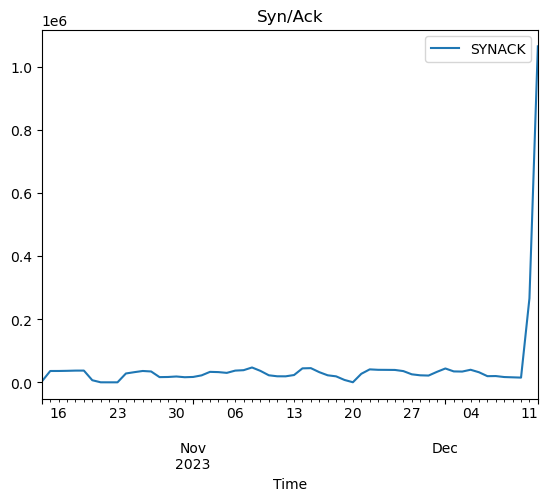

In [14]:
SYNACKnum = pd.read_csv('C:/Users/rocco/OneDrive/Desktop/test/Synack2.csv', parse_dates=True)


SYNACKnum['Time'] = pd.to_datetime(SYNACKnum['Time'])
synack = SYNACKnum.resample('D', on='Time').sum()
print(synack)
print(synack.shape)
synack.plot(title='Syn/Ack')

                     SYN
Time                    
2023-10-14  3.118872e+03
2023-10-15  3.957553e+04
2023-10-16 -1.725370e+04
2023-10-17  3.174956e+04
2023-10-18  2.693247e+04
2023-10-19  3.905322e+04
2023-10-20  5.604792e+03
2023-10-21  0.000000e+00
2023-10-22  0.000000e+00
2023-10-23  0.000000e+00
2023-10-24  1.894205e+04
2023-10-25 -9.708773e+03
2023-10-26  3.905406e+04
2023-10-27 -1.502514e+04
2023-10-28  1.871626e+04
2023-10-29  1.762570e+04
2023-10-30 -3.804608e+04
2023-10-31  1.094290e+04
2023-11-01  1.816612e+04
2023-11-02  1.248642e+04
2023-11-03  3.577335e+04
2023-11-04  3.496032e+04
2023-11-05  3.231410e+04
2023-11-06  3.969055e+04
2023-11-07  4.082923e+04
2023-11-08  4.928687e+04
2023-11-09  3.864309e+04
2023-11-10  2.395102e+04
2023-11-11  2.091369e+04
2023-11-12  2.089294e+04
2023-11-13  2.545326e+04
2023-11-14  4.803202e+04
2023-11-15  4.846044e+04
2023-11-16  3.499980e+04
2023-11-17  2.719070e+04
2023-11-18  2.080921e+04
2023-11-19  8.147780e+03
2023-11-20  2.428234e+02


<AxesSubplot:title={'center':'Syn'}, xlabel='Time'>

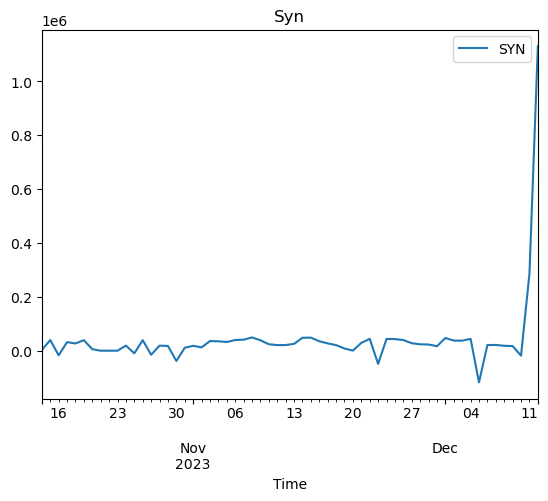

In [15]:
SYNnum = pd.read_csv('C:/Users/rocco/OneDrive/Desktop/test/SYN.csv', parse_dates=True)


SYNnum['Time'] = pd.to_datetime(SYNnum['Time'])
syn = SYNnum.resample('D', on='Time').sum()
print(syn)
print(syn.shape)
syn.plot(title='Syn')

In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
# Funzione per verificare la correlazione tra due serie temporali utilizzando Pearson correlation
def check_correlation(data1, data2):
    # Carica i dati temporali dal file CSV per entrambe le serie temporali
    df1 = data1
    df2 = data2
    
    # Estrae le colonne che si desidera utilizzare per il calcolo della correlazione
    x = df1['SYNACK']
    y = df2['SYN']
    
    if len(x) != len(y):
        return ("I due flussi non hanno la stessa lunghezza")
    # Calcolo della correlazione di Pearson
    correlation, _ = pearsonr(x, y)
    #print(correlation)
    
    return correlation


correlation_result = check_correlation(synack, syn)
print(f"Esiste una correlazione tra le due serie temporali? {correlation_result}")


Esiste una correlazione tra le due serie temporali? 0.9848710130278445
